# Initial Info and Goals

**Data**

Using a (modified) subset of LendingClub Dataset from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

**Goal**

Using the given historical data on loans to be able to predict if a new borrower will pay back or default (charged off) on their loan.

# Loading the Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [4]:
print(data_info)

                                                            Description
LoanStatNew                                                            
loan_amnt             The listed amount of the loan applied for by t...
term                  The number of payments on the loan. Values are...
int_rate                                      Interest Rate on the loan
installment           The monthly payment owed by the borrower if th...
grade                                            LC assigned loan grade
sub_grade                                     LC assigned loan subgrade
emp_title             The job title supplied by the Borrower when ap...
emp_length            Employment length in years. Possible values ar...
home_ownership        The home ownership status provided by the borr...
annual_inc            The self-reported annual income provided by th...
verification_status   Indicates if income was verified by LC, not ve...
issue_d                             The month which the loan was

Can see what will be all the column labels/ data with a description of what it actually means, so if we to call one specifically such as wanting to know the description of title that would be as follows:

In [5]:
print(data_info.loc['title']['Description'])

The loan title provided by the borrower


Creating a function that makes the above process easier to call

In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('loan_status')

Current status of the loan


# Loading the Data

In [8]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Exploratory Data Analysis

#### Initial Exploration

<Axes: xlabel='loan_status', ylabel='count'>

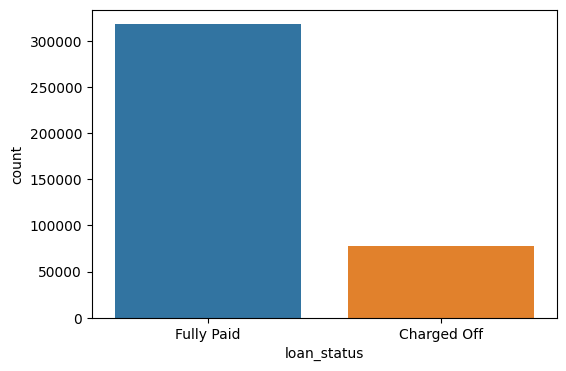

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

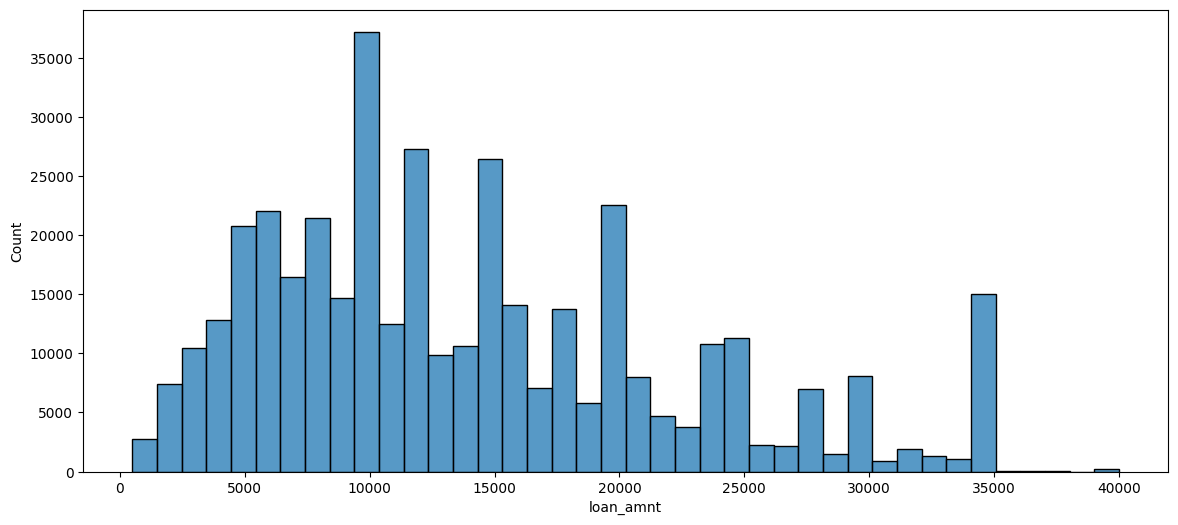

In [12]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='loan_amnt', bins=40)

#### Looking at Correlation between data

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

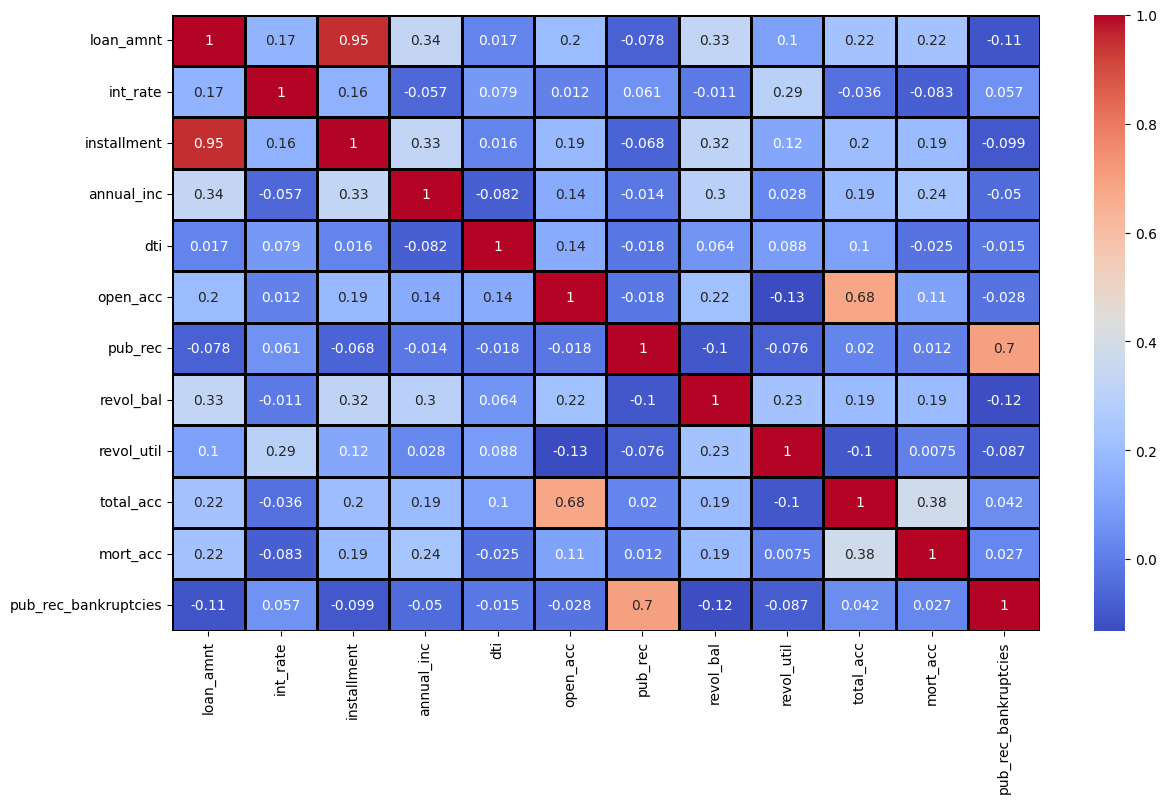

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,lw=1,linecolor='black')

#### The features with almost perfect correlation (0.95)

In [15]:
feat_info('loan_amnt')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='installment', ylabel='loan_amnt'>

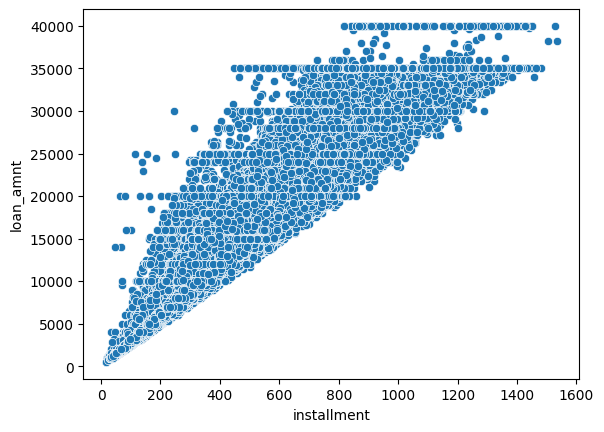

In [16]:
sns.scatterplot(x='installment', y='loan_amnt',data=df)

There is an expected correlation between these values when it is the total of the loan and monthy repayment towards the loan, but the total loan length also has to be a factor for consideration here which isn't showing in the correlation plot as the original data contains text (months) rather than being entirely numrecial.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

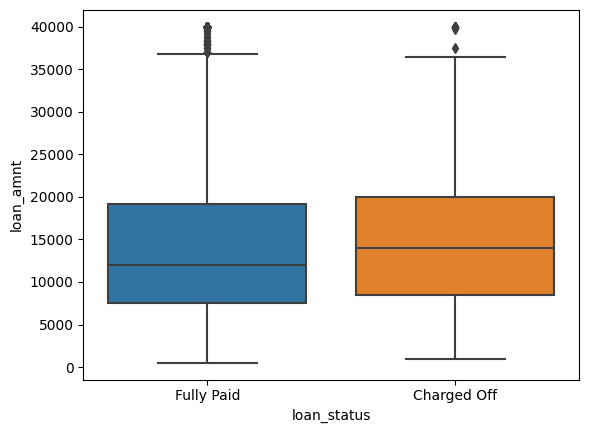

In [17]:
sns.boxplot(data=df,x='loan_status', y='loan_amnt')

#### Looking at possible values of grade and sub grade with meanings

In [18]:
feat_info('grade')
sorted(df['grade'].unique())

LC assigned loan grade


['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
feat_info('sub_grade')
sorted(df['sub_grade'].unique())

LC assigned loan subgrade


['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

These meanings don't explain much, is there any pattern with the grades or sub grades though

<Axes: xlabel='grade', ylabel='count'>

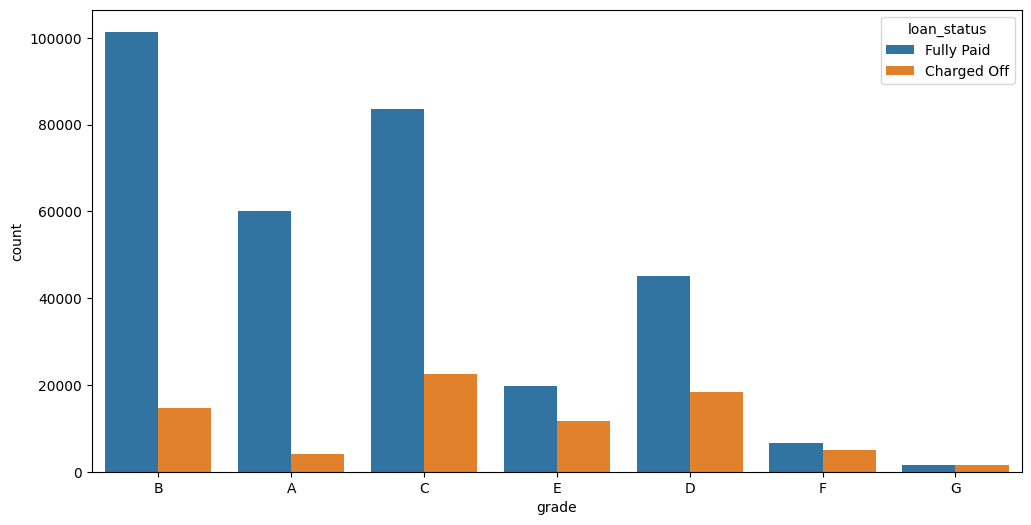

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='loan_status', data=df)

Now to include the extra info contained within subgrade

<Axes: xlabel='sub_grade', ylabel='count'>

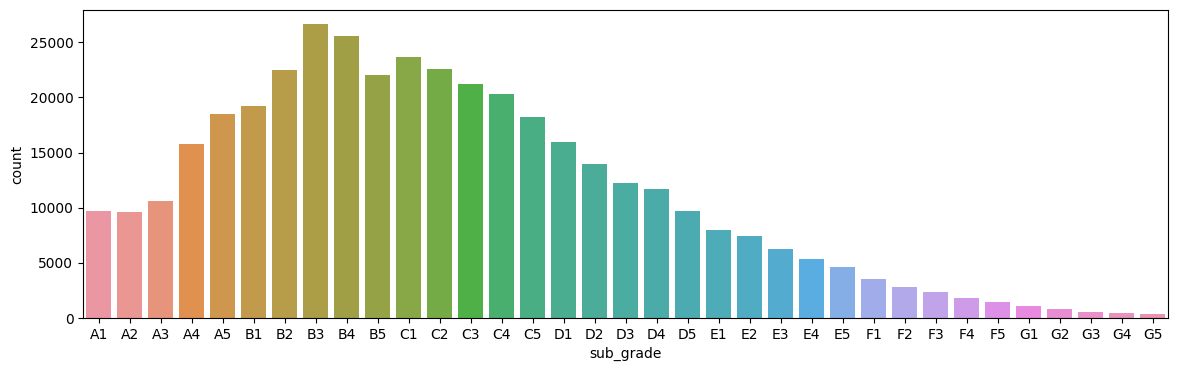

In [21]:
plt.figure(figsize=(14,4))
ord_subgrade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', order=ord_subgrade,  data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

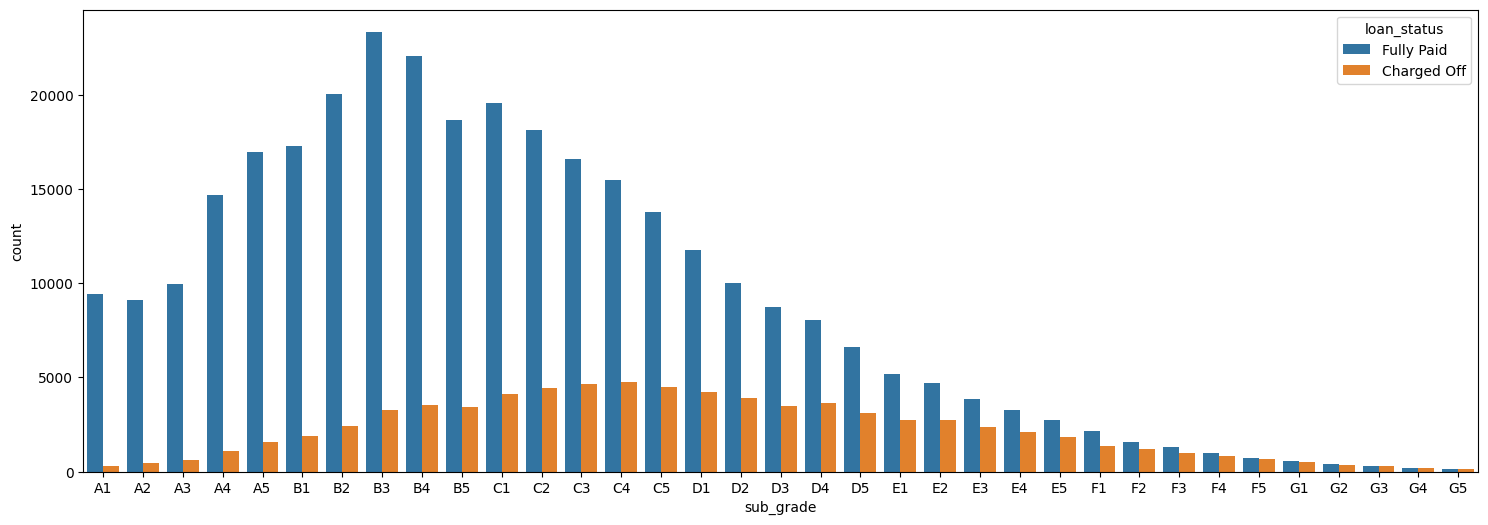

In [22]:
plt.figure(figsize=(18,6))
ord_subgrade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', order=ord_subgrade, hue='loan_status',  data=df)

F & G grades seem less likely to be fully paid :than other grades, as part of the overall the trend seems to be that earlier letters are more likely to have been fully paid


#### Creating a numeric column for if repaid

Making a binary table for if the loan is repaid using the loan_status information

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Charged Off':0,'Fully Paid':1})

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Checking the correlation of the numeric features to this loan_repaid column

<Axes: >

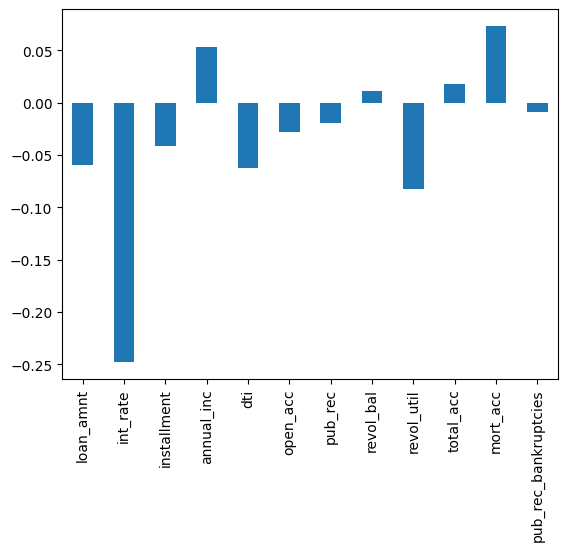

In [25]:
df.corr()['loan_repaid'].drop('loan_repaid').plot(kind='bar')

# Data Preprocessing

#### Checking for null data

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

As a % of total data

In [27]:
len(df)

396030

In [28]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### 'emp' (employment) data

Looking at the descriptions of two fields with missing data related to employment given the shorthand name used

In [29]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


Looking at amount of different job titles

In [30]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Far too many to potentially create a dummy variable from with 149428 unique values and potentially many of them just being for 1 person looking at the end of the above information. So this looks like a good column to remove from the data before moving onto looking at employment length.

In [31]:
df = df.drop('emp_title', axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

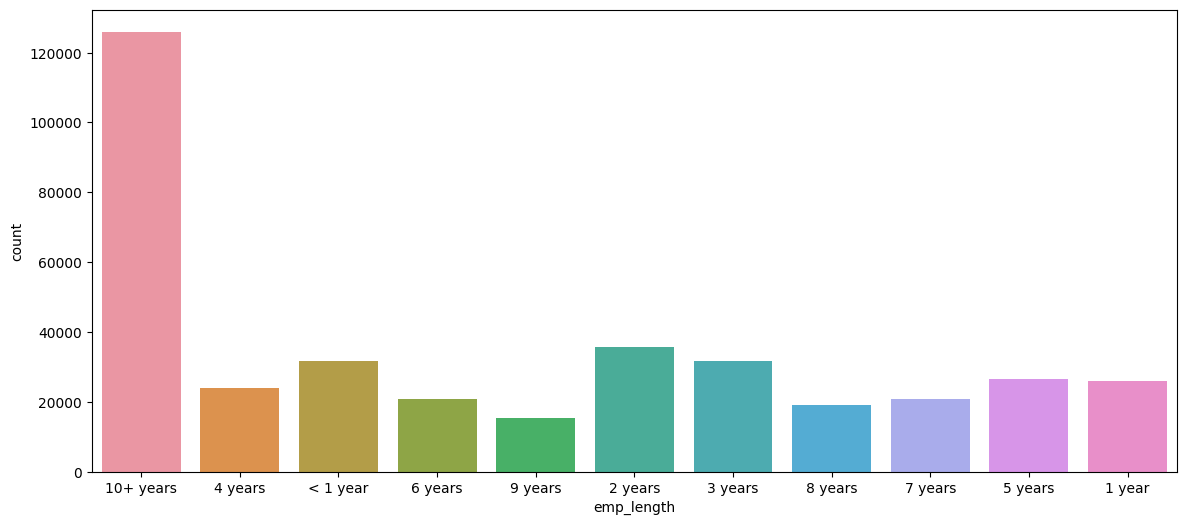

In [32]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='emp_length')

Ok that plots in an awkward order, lets fix that

<Axes: xlabel='emp_length', ylabel='count'>

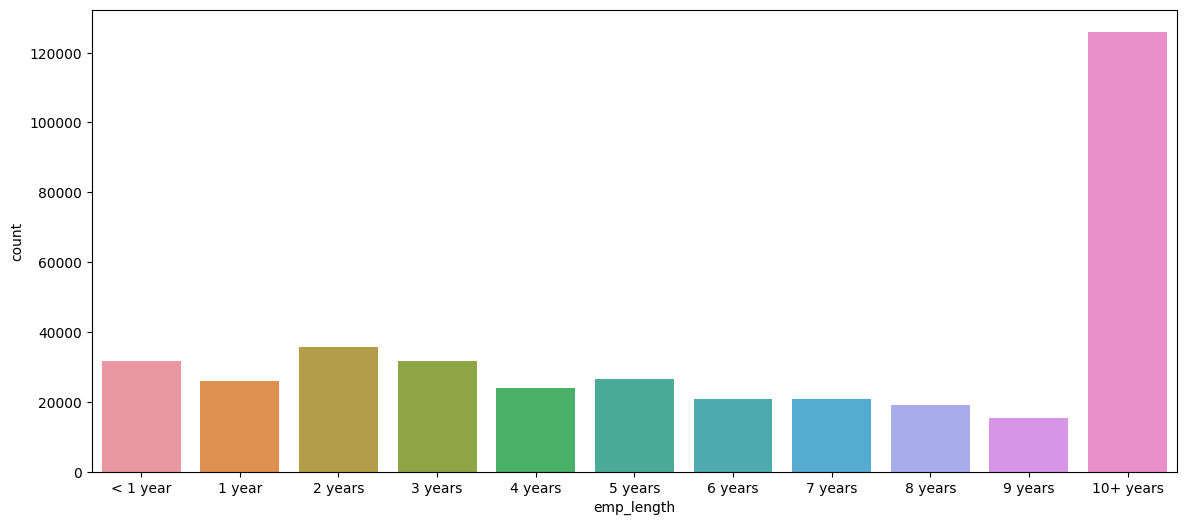

In [33]:
order_emp_length = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='emp_length', order=order_emp_length)

<Axes: xlabel='emp_length', ylabel='count'>

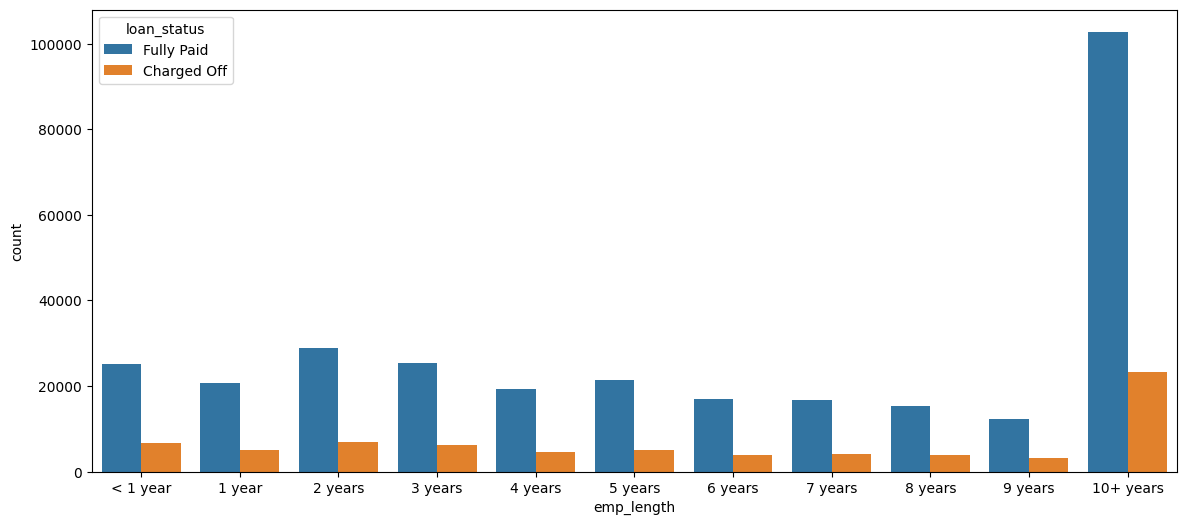

In [34]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='emp_length', order=order_emp_length, hue='loan_status')

While it doesn't like there's any correlation between employment length and loans being paid off, would be better off confirming that with the % values

In [35]:
emp_unpaid = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

<Axes: xlabel='emp_length'>

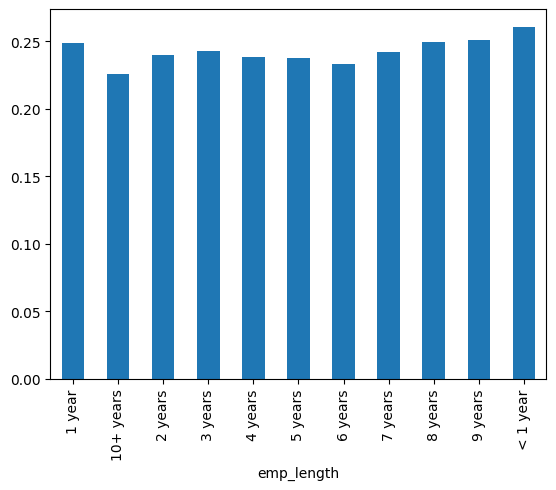

In [36]:
(emp_unpaid/ emp_paid).plot(kind='bar')

No correlation as expected between employment length and it being repaid as the ratio is about 0.23-0.25 for all lenghts (23-25%) which means it also can be dropped.

In [37]:
df = df.drop('emp_length', axis=1)

#### 'mort_acc' data

In [38]:
feat_info('mort_acc')
df['mort_acc'].value_counts()

Number of mortgage accounts.


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

Quite a range of values, but does anything correlate with it to possibly make estimates for null data as it was nearly 10% of the data that is missing a value here.

In [39]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

so closest correlation is total_acc which sounds like it represents somethign related

In [40]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [41]:
total_acc_mean = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [42]:
def mort_acc_est(cols):
    total_acc = cols[0]
    mort_acc = cols[1]
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [43]:
df['mort_acc'] = df[['total_acc', 'mort_acc']].apply(mort_acc_est, axis=1)

Remaining Null Data check

In [44]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
loan_repaid                0
dtype: int64

#### 'title' data

In [45]:
feat_info('title')

The loan title provided by the borrower


In [46]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

Looks similar to what the purpose might contain, lets take a look

In [47]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [48]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [49]:
df['title'].nunique()

48817

Seems like purpose is a more well defined loan reason than the titles given

In [50]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

So we can go ahead and drop the title column from the data

In [51]:
df = df.drop('title', axis=1)

#### Remaining fields with null data

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [53]:
feat_info('revol_util')
feat_info('pub_rec_bankruptcies')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of public record bankruptcies


Would lose less than 0.5 % of the data to just remove the rows containing these null values, just wanted to see what the features were actually representing first

In [54]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [55]:
print(len(df))

395219


# Categorical and Dummy Variables

##### Non numerical columns

In [56]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

##### Column 'Term'

checking the description of the column

In [57]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


That sounds like it should be numeric of either 36 or 60 with months being indicated elsewhere

In [58]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [59]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [60]:
df['term'].unique()

array([36, 60], dtype=int64)

##### Columns 'grade' and 'subgrade'

From earlier we know that grade is A-G, subgrade is A1-G6 so subgrade contains the information grade does which means grade can be removed and subgrade will have to be made into dummy variables

In [61]:
df = df.drop('grade', axis=1)

In [62]:
sub = pd.get_dummies(df['sub_grade'],drop_first=True)

In [63]:
df = df.drop(['sub_grade'], axis= 1)
df = pd.concat([df,sub],axis=1)

#### Checking the remaining fields

In [64]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.select_dtypes(['object']).head()

,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


#### Columns 'home_ownership', 'verification_status', 'initial_list_status', 'application_type', 'purpose'

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [67]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [68]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [69]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

So these 4 columns along with purpose as was shown earlier can all have dummy variables created from and used to replace them, though looking at home_ownership, should merge none and any into other due to how few times these values show up

In [70]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace=True)

In [71]:
multiple_dummies = pd.get_dummies(df[['home_ownership','verification_status','initial_list_status','application_type','purpose']],drop_first=True)
df = df.drop(['home_ownership','verification_status','initial_list_status','application_type','purpose'], axis=1)
df = pd.concat([df,multiple_dummies],axis=1)

In [72]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [73]:
feat_info('issue_d')
feat_info('earliest_cr_line')

The month which the loan was funded
The month the borrower's earliest reported credit line was opened


To have issued a loan and therefore funded it, it means that the application for one has been accepted, which when we are trying to model the risk of accepting this is data that would occur after our models are produced and should be dropped. While for the earliest_cr_line we can extract the date from this in a numerical form

In [74]:
df.drop(['issue_d'],axis=1, inplace=True)

#### Column 'earliest_cr_line'

In [75]:
df['earliest_cr_month'] = df['earliest_cr_line'].apply(lambda y: y[:3])
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda y: int(y[-4:]))

In [76]:
month ={'Jan':1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May':5, 'Jun': 6, 'Jul': 7, 'Aug': 8,'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df.replace({'earliest_cr_month': month},inplace=True)

In [77]:
df['earliest_cr_month'].value_counts()

10    38226
9     37581
8     37279
11    35498
12    33601
7     31903
3     31556
1     30639
6     30393
5     30385
4     29177
2     28981
Name: earliest_cr_month, dtype: int64

In [78]:
df.drop(['earliest_cr_line'],axis=1, inplace=True)

#### Column 'address'

In [79]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'address'], dtype='object')

The address field remains, can use the zip (post) code part to make some dummy variables that'll have some meaning but the rest of the address isn't so useful 

In [80]:
df['zip_code'] = df['address'].apply(lambda ress: ress[-5:])


In [81]:
address_dummy = pd.get_dummies(df['zip_code'], drop_first=True)
df.drop(['address','zip_code'], axis=1, inplace=True)
df = pd.concat([df, address_dummy], axis=1)

#### End result

So now the remaining thing to be dropped is loan_status as made it's replacement earlier with loan_repaid, it was kept for some of the data exploration where the old field was used as a key

In [82]:
df = df.drop('loan_status',axis=1)

In [83]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_we

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

# Training the Data Model

#### Train test split

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Normalising the Data

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Creating the Model

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [89]:
model = Sequential()

# input layer nodes ~ columns count
model.add(Dense(79, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer ending in 1 node
model.add(Dense(units=1,activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [90]:
model.fit(x=X_train, y=y_train, epochs = 25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3028 - val_loss: 0.2646
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2658 - val_loss: 0.2643
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2633 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2618 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2610 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2605 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2601 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2597 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2590 - val_loss: 0.2612
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.259

#### Saving the Model

In [91]:
from tensorflow.keras.models import load_model

model.save('lending_club_project_model.h5')

# Model Performance 

#### Comparing losses

<Axes: >

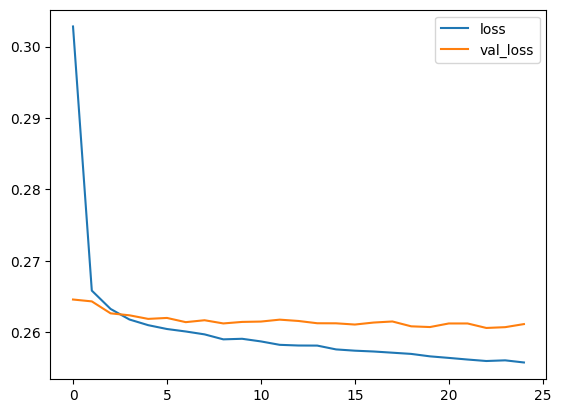

In [92]:
loss = pd.DataFrame(model.history.history)
loss[['loss','val_loss']].plot()

#### Classification report and confusion matrix

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
pred = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 1s 535us/step


In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



So it has an accuracy of 89% on what would appear to be a 50-50 choice but the outcomes of loan being repaid were far more frequently than not it creates an imbalanced data set

In [106]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [107]:
317969/len(df)

0.8045387494022301

If 80% of the outcomes are the loan repaid that means could get 80% success just by always approving the loan, but the 89% from the model is still an improvement to this

In [96]:
confusion_matrix(y_test,pred)

array([[ 7174,  8484],
       [  346, 63040]], dtype=int64)

#### A Singular Test

Using a single sample of data to see the outcome

In [103]:
import random
random.seed(77)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt       25450.00
term               36.00
int_rate           20.20
installment       948.41
annual_inc     114000.00
                 ...    
30723               0.00
48052               0.00
70466               0.00
86630               0.00
93700               0.00
Name: 132764, Length: 79, dtype: float64

In [104]:
model.predict(new_customer.values.reshape(1,79))

1/1 [==============================] - 0s 15ms/step


array([[1.]], dtype=float32)

Checking if they did actually repay the loan

In [105]:
df.iloc[random_ind]['loan_repaid']

1.0